In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion_mejorado.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.
Modelo Modelos/Modelo_Precios_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


Generando 10 recetas aleatorias, esto puede tardar varios minutos...


<AxesSubplot:>

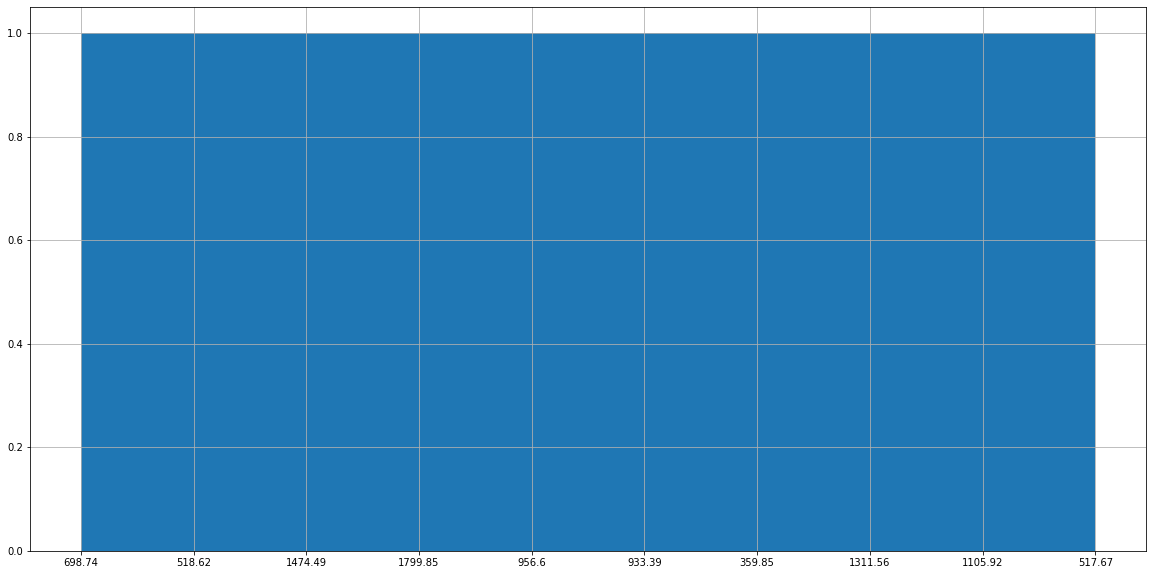

In [5]:
test = recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion_mejorado.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=10,
                                                  min_kcal=300, max_kcal= 1800,
                                                  numero_recetas=10, _INTENTOS=5,
                                                  )

df = pd.DataFrame(test, columns=['ingredientes', 'kcal', 'carbs', 'prot', 'grasas']) 
plt.figure(figsize=(20,10))
df['kcal'].hist()

* Entrenar información nutricional


ITERACIÓN: 1
min unidades: 1  max unidades: 10
min kcal: 300  max kcal: 800
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/100_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/100_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 100 recetas aleatorias, esto puede tardar varios minutos...
Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_63 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

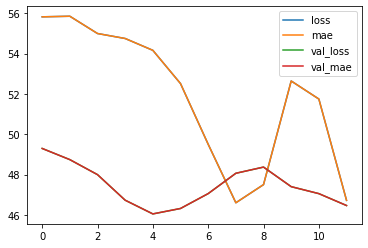

1/1 [==============================] - 0s 208ms/step - loss: 58.7847 - mae: 58.7847
[58.784698486328125, 58.784698486328125]
1/1 [==============================] - 0s 139ms/step
receta 0 kcal_true: 570.5 kcal_pred: 439.48297  precisión: 77.0 %
receta 0 carbohydrate_true: 40.97 carbohydrate_pred: 46.470436  precisión: 88.2 %
receta 0 protein_true: 53.0 protein_pred: 25.21257  precisión: 47.6 %
receta 0 total_fat_true: 22.44 total_fat_pred: 12.59437  precisión: 56.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 501.5 kcal_pred: 476.8508  precisión: 95.1 %
receta 1 carbohydrate_true: 42.56 carbohydrate_pred: 50.164814  precisión: 84.8 %
receta 1 protein_true: 35.47 protein_pred: 26.804653  precisión: 75.6 %
receta 1 total_fat_true: 23.45 total_fat_pred: 13.680926  precisión: 58.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 661.5 kcal_pred: 473.71567  precisión: 71.6 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_64 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

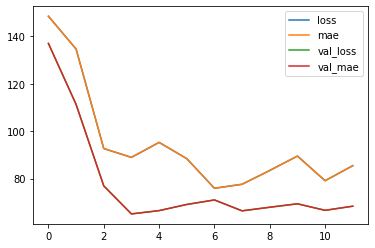

1/1 [==============================] - 0s 208ms/step - loss: 85.8619 - mae: 85.8619
[85.8619384765625, 85.8619384765625]
1/1 [==============================] - 0s 140ms/step
receta 0 kcal_true: 1150.0 kcal_pred: 831.22394  precisión: 72.3 %
receta 0 carbohydrate_true: 242.6 carbohydrate_pred: 83.51313  precisión: 34.4 %
receta 0 protein_true: 46.16 protein_pred: 56.077286  precisión: 82.3 %
receta 0 total_fat_true: 11.76 total_fat_pred: 27.67535  precisión: 42.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 965.5 kcal_pred: 743.2165  precisión: 77.0 %
receta 1 carbohydrate_true: 181.2 carbohydrate_pred: 74.99405  precisión: 41.4 %
receta 1 protein_true: 41.12 protein_pred: 50.54212  precisión: 81.4 %
receta 1 total_fat_true: 8.55 total_fat_pred: 24.632874  precisión: 34.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1163.0 kcal_pred: 977.47  precisión: 84.0 %
receta 2 carbohydrate_t

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_65 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

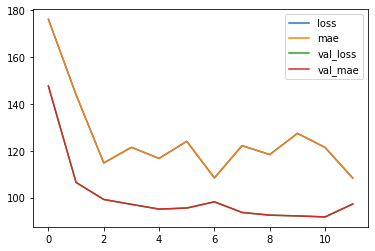

1/1 [==============================] - 0s 204ms/step - loss: 125.3197 - mae: 125.3197
[125.31974792480469, 125.31974792480469]
1/1 [==============================] - 0s 143ms/step
receta 0 kcal_true: 1505.0 kcal_pred: 1193.9381  precisión: 79.3 %
receta 0 carbohydrate_true: 0.32 carbohydrate_pred: 141.18921  precisión: 0.2 %
receta 0 protein_true: 0.05 protein_pred: 67.123825  precisión: 0.1 %
receta 0 total_fat_true: 170.1 total_fat_pred: 35.09832  precisión: 20.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1621.0 kcal_pred: 1358.4939  precisión: 83.8 %
receta 1 carbohydrate_true: 153.8 carbohydrate_pred: 133.27219  precisión: 86.7 %
receta 1 protein_true: 113.9 protein_pred: 83.29609  precisión: 73.1 %
receta 1 total_fat_true: 59.38 total_fat_pred: 49.156136  precisión: 82.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1430.0 kcal_pred: 1183.8091  precisión: 82.8 %
receta 2 carb

100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_66 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

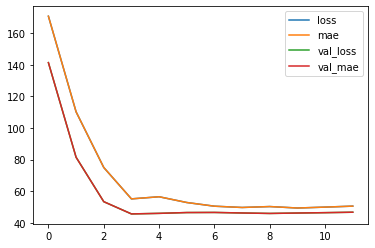

1/1 [==============================] - 0s 411ms/step - loss: 66.9618 - mae: 66.9618
[66.96175384521484, 66.96175384521484]
1/1 [==============================] - 0s 201ms/step
receta 0 kcal_true: 361.2 kcal_pred: 463.50244  precisión: 77.9 %
receta 0 carbohydrate_true: 52.44 carbohydrate_pred: 46.887356  precisión: 89.4 %
receta 0 protein_true: 9.62 protein_pred: 24.848106  precisión: 38.7 %
receta 0 total_fat_true: 13.15 total_fat_pred: 11.1206665  precisión: 84.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 386.5 kcal_pred: 565.87854  precisión: 68.3 %
receta 1 carbohydrate_true: 66.75 carbohydrate_pred: 56.508915  precisión: 84.7 %
receta 1 protein_true: 18.4 protein_pred: 29.033241  precisión: 63.4 %
receta 1 total_fat_true: 7.51 total_fat_pred: 13.668084  precisión: 55.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 634.5 kcal_pred: 611.15094  precisión: 96.3 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_67 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

OSError: [Errno 22] Unable to create file (unable to open file: name = 'Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5', errno = 22, error message = 'Invalid argument', flags = 13, o_flags = 302)

In [26]:
recomendador128.NUM_RECETAS = 100
recomendador128.EMB_SIZE = 128
BATCHSIZE = 8
ITER = 4
INITIAL_EPOCH = 0
EPOCHS = recomendador128.NUM_RECETAS // BATCHSIZE
#EPOCHS = 15
LR = 1e-4

Rangos_kcal = [
                (300, 800),
                (801, 1200),
                (1201, 1700)           
                #(500, 1500)              
              ]

Its = []
Valmaes = []

Histories = []
val_mae = 1000
MAX_VAL_MAE = 20

iteracion = 0
#for iteracion in range(ITER):
while val_mae > MAX_VAL_MAE:
  MINU = 1 
  MAXU = 10  
  #INITIAL_EPOCH = 0
  

  for ik in range(len(Rangos_kcal)):
    MINK, MAXK = Rangos_kcal[ik]
    print('\nITERACIÓN:', iteracion+1)
    print('min unidades:',MINU, ' max unidades:', MAXU)
    print('min kcal:', MINK, ' max kcal:', MAXK)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    try:
      modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion_mejorado.csv',
                                    #df_training='recipes_con_info_nutricional.csv',
                                    #df_test='recetas_test.csv', 
                                    #df_val='recetas_val.csv',
                                    learning_rate=LR,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    batch_size=BATCHSIZE,
                                    kernels=128,                                             
                                    min_ingredientes=5, max_ingredientes=11,                                  
                                    min_unidades=MINU, max_unidades=MAXU,  
                                    min_kcal=MINK, max_kcal= MAXK,                             
                                    save=True, verbose=True)
      INITIAL_EPOCH = history.epoch[-1]

      iteracion += 1
      val_mae = float(history.history['val_mae'][-1])
      Its.append(iteracion)
      Valmaes.append(val_mae)
      if val_mae <= MAX_VAL_MAE: break

      Histories.append(history)
    except:
      print('Falló al entrenar en interación', iteracion)
      pass
    
dfVM = pd.DataFrame({'iteracion':Its, 'val_mae':Valmaes}, columns=['iteracion', 'val_mae'])
dfVM.plot(kind='bar', x='iteracion', y='val_mae')

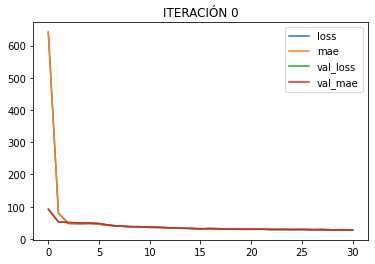

LOSS: 28.197813034057617  -- MAE: 28.197813034057617  -- VAL_LOSS: 28.014734268188477  -- VAL_MAE: 28.014734268188477
----------------------------------------------------------


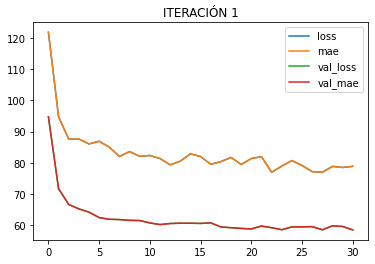

LOSS: 78.85263061523438  -- MAE: 78.85263061523438  -- VAL_LOSS: 58.481346130371094  -- VAL_MAE: 58.481346130371094
----------------------------------------------------------


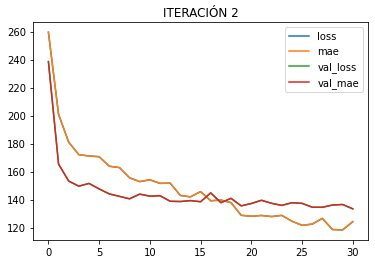

LOSS: 124.19448852539062  -- MAE: 124.19448852539062  -- VAL_LOSS: 133.3741455078125  -- VAL_MAE: 133.3741455078125
----------------------------------------------------------


In [15]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

* Entrenar precios


ITERACIÓN: 1
Entrenando desde epoch 0
------------------------------------------

Generando 100  recetas aleatorias...



100%|██████████| 100/100 [00:00<00:00, 396.31it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_9 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

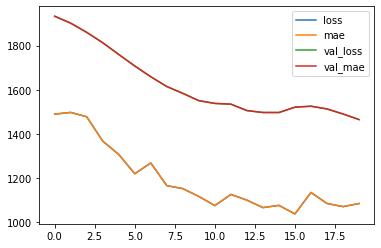

1/1 [==============================] - 0s 357ms/step - loss: 168.5878 - mae: 168.5878
[168.5878448486328, 168.5878448486328]
1/1 [==============================] - 0s 360ms/step
receta 0 precio_prom_por_gramo_true: 17.34 precio_prom_por_gramo_pred: 28.393808  precisión: 61.1 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 176.2 precio_prom_por_gramo_pred: 134.73662  precisión: 76.4 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 12104.0 precio_prom_por_gramo_pred: 11187.484  precisión: 92.4 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 28.03 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 499.8 precio_prom_por_gramo_pred: 537.23615  precisión: 93.0 %
-----------------------

100%|██████████| 100/100 [00:00<00:00, 334.23it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_10 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

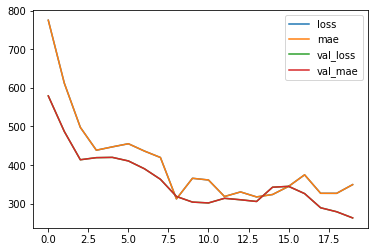

1/1 [==============================] - 0s 308ms/step - loss: 2222.9263 - mae: 2222.9263
[2222.92626953125, 2222.92626953125]
1/1 [==============================] - 0s 275ms/step
receta 0 precio_prom_por_gramo_true: 229.6 precio_prom_por_gramo_pred: 151.47485  precisión: 66.0 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 212.5 precio_prom_por_gramo_pred: 347.7243  precisión: 61.1 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 600.5 precio_prom_por_gramo_pred: 532.62994  precisión: 88.7 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 9950.0 precio_prom_por_gramo_pred: 130.0047  precisión: 1.3 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 634.0 precio_prom_por_gramo_pred: 655.0654  precisión: 96.8 %
---------------------

In [ ]:
recomendador128.NUM_RECETAS = 5000
recomendador128.EMB_SIZE = 128
BATCHSIZE = 32
ITER = 1
INITIAL_EPOCH = 0
EPOCHS = recomendador128.NUM_RECETAS // BATCHSIZE


Histories_precios = []
for iteracion in range(ITER):
    print('\nITERACIÓN:', iteracion+1)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128_precios, history_precios = recomendador128.EntrenarModeloPrecios(
                                    df_precios='lista_precios_profeco_2022.csv',                                   
                                    learning_rate=1e-4,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    min_ingredientes=5, max_ingredientes=11,                                  
                                    min_unidades=MINU, max_unidades=MAXU,
                                    batch_size=BATCHSIZE,
                                    kernels=128,                                                                         
                                    save=True, verbose=True)
    INITIAL_EPOCH = history_precios.epoch[-1]

    Histories_precios.append(history_precios)

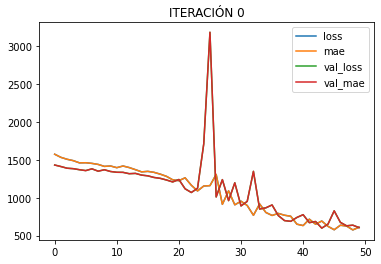

LOSS: 610.884521484375  -- MAE: 610.884521484375  -- VAL_LOSS: 605.876708984375  -- VAL_MAE: 605.876708984375
----------------------------------------------------------


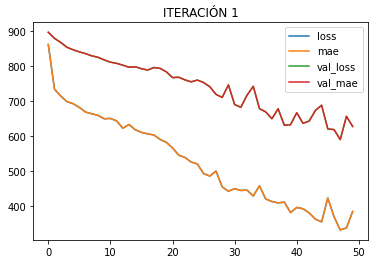

LOSS: 384.781494140625  -- MAE: 384.781494140625  -- VAL_LOSS: 627.9765014648438  -- VAL_MAE: 627.9765014648438
----------------------------------------------------------


In [10]:
for i in range(len(Histories_precios)):
    history = Histories_precios[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')